In [2]:
import seaborn as sb
import pandas as pd
import kneed
from matplotlib import pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import numpy as np

In [3]:
def read_file(url):

    url = url + "?raw=true"
    df = pd.read_csv(url, encoding='cp1252', sep=',', low_memory=False)
    return df

In [4]:
url = "https://github.com/hannahgathu/Thesis-Data-Visualisations/blob/main/Data/PBT_Concern_Data_Prepped.csv"

df= read_file(url)

In [5]:
columnsNamesArr = df.columns.values

In [6]:
columnsNamesArr

array(['ï»¿CAS-RN', 'NAME', 'STATUS_TEXT', 'STATUS_BIN', 'SMILES',
       'k OH (AOPv1.92) atmospheric', 't1/2 atmosphere in hours',
       'VP (mm Hg, MPVPBP v1.43)', 'VP (Pa, MPBPVPwin))', 'BIOWIN1',
       'BIOWIN2', 'BIOWIN3', 't1/2(water)hrs', 't1/2(soil)hrs', 'BIOWIN4',
       'BIOWIN5', 'BIOWIN6', 'log Kow (KowWin v1.67)',
       'log Koa (KoaWin v1.10)', 'log Kaw (=Kow/Koa',
       'BCF (BCFBAF v3.00)', 'BCFmax', 'kM halflife (days, BCFBAF v3.00)',
       'kM', 'BCF(metabolism)', 'TMF air', 'TMF pelagic', 'BAF air',
       'LRTP-Pov', 'LRTP-CTD', 'LRTP-TE', 'MW', 'P-score', 'B-score'],
      dtype=object)

In [7]:
true_labels = df.loc[:,"STATUS_BIN"]

In [8]:
features= df.iloc[:,5:]

In [9]:
features.head()

,k OH (AOPv1.92) atmospheric,t1/2 atmosphere in hours,"VP (mm Hg, MPVPBP v1.43)","VP (Pa, MPBPVPwin))",BIOWIN1,BIOWIN2,BIOWIN3,t1/2(water)hrs,t1/2(soil)hrs,BIOWIN4,...,BCF(metabolism),TMF air,TMF pelagic,BAF air,LRTP-Pov,LRTP-CTD,LRTP-TE,MW,P-score,B-score
0,8.130000e-12,47.4,3500.000000,465000.000000,1.0179,0.9999,3.1551,274.0,548.0,4.0011,...,2.7973,1.1,5.4,3.1,25.208741,2986.407997,12.880630,30.03,0.0342,0.0039
1,1.870000e-11,20.6,0.000080,0.010600,1.1799,0.9937,3.4756,147.0,293.0,4.1032,...,0.7679,-3.6,3.6,0.8,14.474931,538.599153,2.357538,92.10,0.0136,0.0014
2,6.140000e-13,627.0,2.300000,305.000000,0.8874,0.9977,3.1801,261.0,522.0,3.9727,...,0.8919,-26.3,-10.1,0.9,67.497249,17735.543150,83.185042,72.06,0.1588,0.0015
3,1.020000e-11,37.9,0.024400,3.240000,1.0309,0.9916,3.0363,345.0,690.0,3.7373,...,7.4899,6.0,6.0,44.6,33.232736,2745.609981,11.779475,122.17,0.0536,0.0282
4,5.860000e-13,657.0,0.000003,0.000337,0.5398,0.6340,2.7481,606.0,1210.0,3.5060,...,12.7775,9.1,-4.2,116.7,55.007040,62.854539,0.070363,167.12,0.1176,0.0563


In [10]:
# scaler = RobustScaler()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [11]:
scaled_features[:5]

array([[-0.43457396, -0.08425513, 11.60371177, 11.58124227,  1.02689343,
         1.1730789 ,  0.9402256 , -0.06791808, -0.06787246,  1.00891017,
         1.86197613,  1.78885854, -1.09829887, -0.04589063, -0.2496945 ,
        -0.3357084 , -0.56264769, -0.04915542,  0.04786328, -0.41400773,
         0.03739825,  0.03740304, -0.35309594, -0.05318248, -0.25600102,
        -0.25636785, -1.37440806, -1.04173359, -0.79373084],
       [-0.24861087, -0.08426407, -0.11893116, -0.1189227 ,  1.29399096,
         1.15903979,  1.30111139, -0.06826   , -0.06821545,  1.1563493 ,
         1.7005105 ,  1.7517692 , -1.70767293, -0.048357  , -0.68070382,
        -0.3357084 , -0.56278191, -0.04915723,  4.344002  , -0.41435278,
         0.03739615,  0.0374023 , -0.35313987, -0.05318343, -0.27296322,
        -0.28229833, -0.98864733, -1.09479303, -0.80166062],
       [-0.56680656, -0.08406179, -0.11122798, -0.11124866,  0.81173153,
         1.16809728,  0.96837582, -0.06795308, -0.06790743,  0.96789869,
  

## K-means

In [12]:
kmeans = KMeans(
    init="random",
    n_clusters=2,
    n_init=10,
    max_iter=300
)

In [13]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=2)

In [14]:
# The lowest SSE value
kmeans.inertia_

15663.696920771119

In [15]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[ 0.18156648, -0.08414105,  0.05190011,  0.0518939 ,  0.52792499,
         0.49428491,  0.57496669, -0.06682234, -0.06677807,  0.5749393 ,
         0.46125033,  0.40879608, -0.42996911,  0.01384954, -0.11627413,
        -0.32146487, -0.4162107 , -0.03566594,  0.19532194, -0.38967072,
        -0.0170265 , -0.01702471, -0.34007776, -0.05317306, -0.13272999,
        -0.17493107, -0.45638049, -0.57771218, -0.49901825],
       [-0.3987978 ,  0.1848098 , -0.11399487, -0.11398124, -1.15954953,
        -1.08566149, -1.26287326,  0.14677049,  0.14667325, -1.26281311,
        -1.0131034 , -0.8978914 ,  0.94439643, -0.03041952,  0.25538783,
         0.70607463,  0.91417706,  0.07833769, -0.42901069,  0.85588391,
         0.03739749,  0.03739357,  0.74695651,  0.11679082,  0.29153195,
         0.38422359,  1.00240714,  1.26890353,  1.09605793]])

In [16]:
# The number of iterations required to converge
kmeans.n_iter_

8

In [17]:
kmeans.labels_[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [1]:
kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_
).round(2)
kmeans_silhouette

NameError: name 'silhouette_score' is not defined

## Checking number of clusters

In [19]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

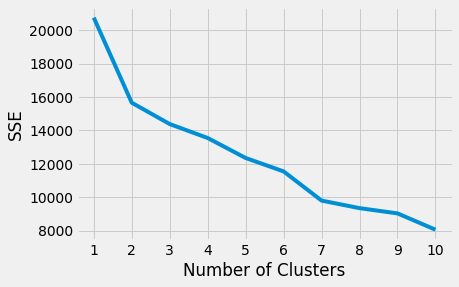

In [20]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

In [21]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

2

In [22]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

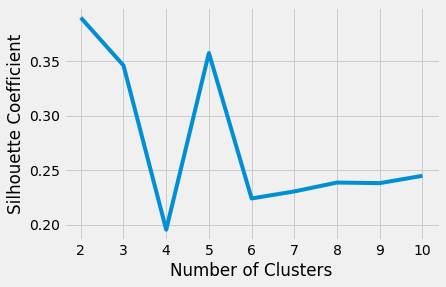

In [23]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## Gaussian Mixture Model

In [24]:
from sklearn.mixture import GaussianMixture

In [25]:
gmm = GaussianMixture(n_components=2)
gmm.fit(scaled_features)

GaussianMixture(n_components=2)

In [27]:
gmm_silhouette

NameError: name 'gmm_silhouette' is not defined

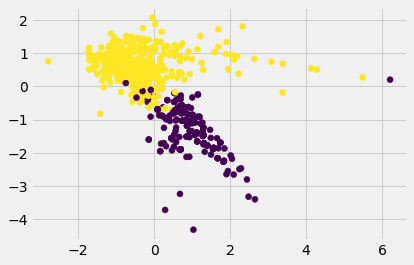

In [34]:
labels = gmm.predict(scaled_features)
plt.scatter(scaled_features[:, 12], scaled_features[:, 9], c=labels, cmap='viridis');

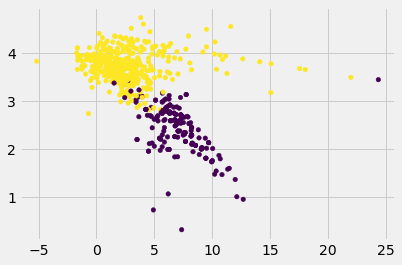

In [38]:
plt.scatter(features.iloc[:,12], features.iloc[:, 9], s=20, c=labels, cmap='viridis');

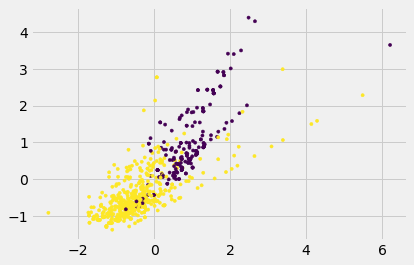

In [42]:
plt.scatter(scaled_features[:,12], scaled_features[:, 26], s=10, c=labels, cmap='viridis');

(0.0, 400.0)

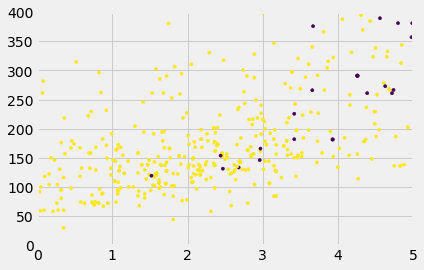

In [50]:
#zoomed in
plt.scatter(features.iloc[:,12], features.iloc[:, 26], s=10, c=labels, cmap='viridis');
plt.xlim(0, 5)
plt.ylim(0, 400)

In [82]:
np.unique(labels)

array([0, 1], dtype=int64)

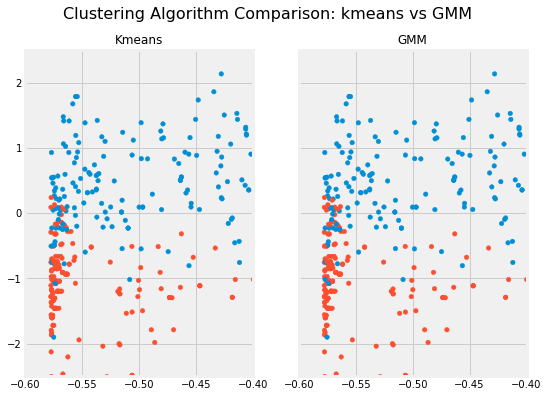

In [95]:
# Plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(8, 6), sharex=True, sharey=True
)
fig.suptitle(f"Clustering Algorithm Comparison: kmeans vs GMM", fontsize=16)
fte_colors = {
    0: "#008fd5",
    1: "#fc4f30"
}
fte_colors2 = {
    1: "#008fd5",
    0: "#fc4f30"
}
# The k-means plot
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(scaled_features[:, 0], scaled_features[:, 10], s=20, c=km_colors)
ax1.set_title(
    "Kmeans", fontdict={"fontsize": 12})

ax1.set_xlim([-0.6, -0.4]) #roughly within [-1,15] range
ax1.set_ylim([-2.5, 2.5])

# The gmm plot
ggm_colors = [fte_colors2[label] for label in labels]
ax2.scatter(scaled_features[:, 0], scaled_features[:, 10], s=20, c=ggm_colors, cmap='viridis');
ax2.set_title(
    "GMM", fontdict={"fontsize": 12})

#ax2.set_xlim([-15, 15])
#ax2.set_ylim([-2.5, 2.5])

plt.show()

## DBSCAN
DBSCAN seems to add everything to the same cluster. If I make epsilon higher, I get a better silhouette score but basically just one cluster. If I make epsilon lower I get a very poor silhouette score.

In [18]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [25]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors()
nbrs = neigh.fit(scaled_features)
distances, indices = nbrs.kneighbors(scaled_features)

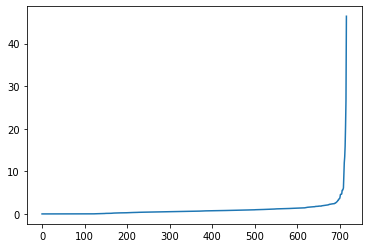

In [26]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [44]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=2.5)

# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_
).round(2)
dbscan_silhouette = silhouette_score(
   scaled_features, dbscan.labels_
).round (2)


In [39]:
kmeans_silhouette

0.39

In [45]:
dbscan_silhouette

0.52

In [40]:
dbscan.labels_[:5]

array([-1,  0,  0,  0,  0], dtype=int64)

In [41]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2], dtype=int64)

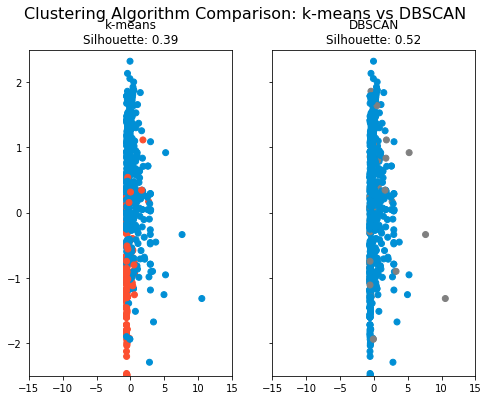

In [46]:
# Plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(8, 6), sharex=True, sharey=True
)
fig.suptitle(f"Clustering Algorithm Comparison: k-means vs DBSCAN", fontsize=16)
fte_colors = {
    -1: "#808080",
    0: "#008fd5",
    1: "#fc4f30",
    2: "#00FFFF",
    3: "#FF00FF",
    4: "#800000",
    5: "#808000",
    6: "#008000",
    7: "#800080",
    8: "#FFFF00",
    9: "#008080",
    10: "#000080"
}
# The k-means plot
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(scaled_features[:, 0], scaled_features[:, 10], c=km_colors)
ax1.set_title(
    f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12}
)
ax1.set_xlim([-15, 15])
ax1.set_ylim([-2.5, 2.5])

# The dbscan plot
db_colors = [fte_colors[label] for label in dbscan.labels_]
ax2.scatter(scaled_features[:, 0], scaled_features[:, 10], c=db_colors)
ax2.set_title(
    f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12}
)

#ax2.set_xlim([-15, 15])
#ax2.set_ylim([-2.5, 2.5])

plt.show()

In [ ]:
sb.lmplot(x='log Kow (KowWin v1.67)', y='MW', hue = kmeans.labels_, data=df)

In [ ]:
import numpy as np

labels = pd.DataFrame(kmeans.labels_)
labels.head()

In [ ]:
sb.lmplot(x='log Kow (KowWin v1.67)', y='MW', hue = labels, data=df)

In [ ]:
# Plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(8, 6), sharex=True, sharey=True
)
fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
fte_colors = {
    0: "#008fd5",
    1: "#fc4f30",
}
# The k-means plot
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(scaled_features[:, 0], scaled_features[:, 9], c=km_colors)
ax1.set_title(
    f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12}
)
ax1.set_xlim([-15, 15])
ax1.set_ylim([-2.5, 2.5])

# The dbscan plot
db_colors = [fte_colors[label] for label in dbscan.labels_]
ax2.scatter(scaled_features[:, 0], scaled_features[:, 9], c=db_colors)
ax2.set_title(
    f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12}
)
plt.show()